<a href="https://colab.research.google.com/github/wanana12/signate/blob/main/balance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ライブラリの読み込み

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## データの読み込み

In [65]:
!ls /content/drive/MyDrive/balance

sample_submit.csv  submit.csv  test.tsv  train.tsv


In [66]:
train = pd.read_csv("/content/drive/MyDrive/balance/train.tsv", sep='\t')
test = pd.read_csv("/content/drive/MyDrive/balance/test.tsv", sep='\t')
sample_submit = pd.read_csv("/content/drive/MyDrive/balance/sample_submit.csv", header=None)

In [67]:
sample_submit.head()

,0,1
0,0,1
1,1,0
2,3,0
3,4,0
4,5,2


In [68]:
train.head()

,Unnamed: 0,class,left_weight,left_distance,right_weight,right_distance
0,2,2,2,4,4,3
1,9,0,2,2,1,3
2,11,0,2,4,4,1
3,13,2,3,3,3,5
4,16,0,3,4,5,2


In [69]:
test.head()

,Unnamed: 0,left_weight,left_distance,right_weight,right_distance
0,0,4,5,4,3
1,1,3,2,1,5
2,3,1,4,5,1
3,4,5,4,4,4
4,5,2,2,4,1


## pandasプロット

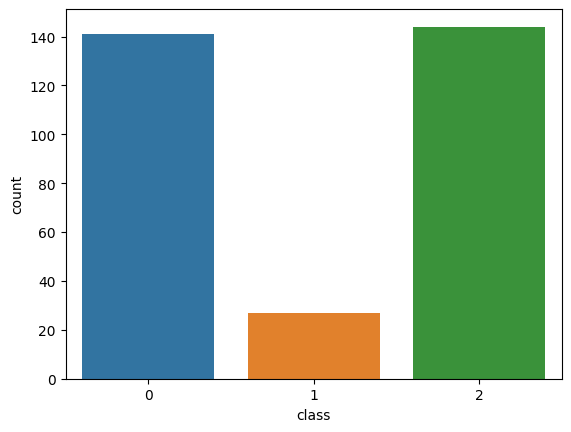

In [70]:
sns.countplot(x="class", data=train)
plt.show()

## データ前処理

In [71]:
data = pd.concat([train, test], sort=False)

In [72]:
data.head()

,Unnamed: 0,class,left_weight,left_distance,right_weight,right_distance
0,2,2.0,2,4,4,3
1,9,0.0,2,2,1,3
2,11,0.0,2,4,4,1
3,13,2.0,3,3,3,5
4,16,0.0,3,4,5,2


In [73]:
print(len(train), len(test), len(data))

312 313 625


In [74]:
data.isnull().sum()

Unnamed: 0          0
class             313
left_weight         0
left_distance       0
right_weight        0
right_distance      0
dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 312
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      625 non-null    int64  
 1   class           312 non-null    float64
 2   left_weight     625 non-null    int64  
 3   left_distance   625 non-null    int64  
 4   right_weight    625 non-null    int64  
 5   right_distance  625 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 34.2 KB


In [76]:
delete_columns = ['Unnamed: 0']
data.drop(delete_columns, axis=1, inplace=True)
data.head()

,class,left_weight,left_distance,right_weight,right_distance
0,2.0,2,4,4,3
1,0.0,2,2,1,3
2,0.0,2,4,4,1
3,2.0,3,3,3,5
4,0.0,3,4,5,2


In [77]:
train = data[:len(train)]
test = data[len(train):]

In [78]:
y_train = train['class']
X_train = train.drop('class', axis = 1)
X_test = test.drop('class', axis = 1)

In [79]:
X_train.head()

,left_weight,left_distance,right_weight,right_distance
0,2,4,4,3
1,2,2,1,3
2,2,4,4,1
3,3,3,3,5
4,3,4,5,2


In [80]:
y_train.head()

0    2.0
1    0.0
2    0.0
3    2.0
4    0.0
Name: class, dtype: float64

## 機械学習

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
clf = LogisticRegression(max_iter=1000)

In [83]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [84]:
y_pred = clf.predict(X_test)

In [85]:
y_pred[:20]

array([0., 2., 2., 0., 2., 2., 0., 0., 0., 2., 2., 0., 2., 0., 0., 0., 2.,
       0., 0., 0.])

In [86]:
clf.score(X_train, y_train)

0.8782051282051282

## データの出力

In [87]:
sub = sample_submit
sub[1] = list(map(int, y_pred))
sub.to_csv("/content/drive/MyDrive/balance/submit.csv", index=False, header=False)

In [88]:
sub.head()

,0,1
0,0,0
1,1,2
2,3,2
3,4,0
4,5,2
